In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## About the dataset
### Expresso Churn Prediction Challenge

Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

In [2]:
train = pd.read_csv('Train.csv')
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [52]:
test = pd.read_csv('Test.csv')
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [53]:
sample = pd.read_csv('SampleSubmission.csv')
sample.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


__Sizes of the dataframes.__

In [54]:
print(train.shape)
print(test.shape)
print(sample.shape)

(2154048, 19)
(380127, 18)
(380127, 2)


Change column names to lowercase.

In [55]:
train = train.rename(columns=str.lower)
test = test.rename(columns=str.lower)
sample = sample.rename(columns=str.lower)

In [56]:
sample.churn.value_counts()

0    380127
Name: churn, dtype: int64

# EDA

## Dataset Description

Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

This solution will help Expresso to better serve their customers by understanding which customers are at risk of leaving.

### Short Description of features:
- user_id: Unique anonymized id of customer
- region: location of client
- tenure: duration in the network
- montant: top-up amount
- frequence-rech: number of times the customer refilled
- revenue: monthly income of each client
- arpu_segment: average income for last 3 months
- frequence: number of times the client has made an income
- data_volume: number of connections
- regularity: number of activities for last 3 months
- top_pack: most popular pack of user
- freq_top_pack: number of activations for top pack of user
- churn: dependent variable

## Short EDA report in HTML format

In [ ]:
import pandas_profiling as pp
profile = pp.ProfileReport(train, title="EDA Report")

# uncomment to create html file
#profile.to_file('report.html')

## Data Description

### Identifying numerical and categorical variables

In [5]:
train.dtypes

user_id            object
region             object
tenure             object
montant           float64
frequence_rech    float64
revenue           float64
arpu_segment      float64
frequence         float64
data_volume       float64
on_net            float64
orange            float64
tigo              float64
zone1             float64
zone2             float64
mrg                object
regularity          int64
top_pack           object
freq_top_pack     float64
churn               int64
dtype: object

<AxesSubplot:ylabel='Density'>

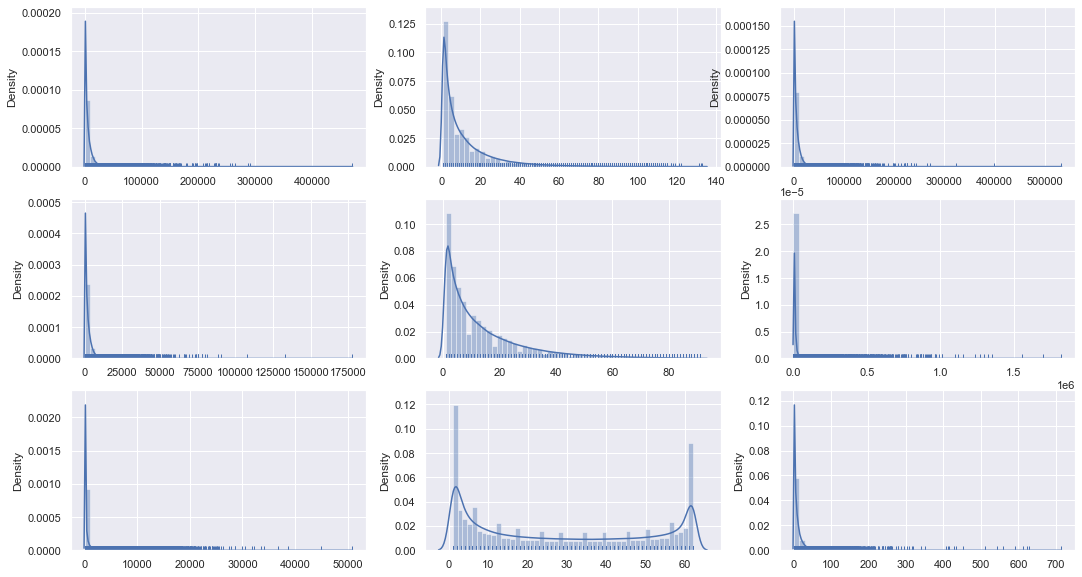

In [6]:
sns.set()
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

sns.distplot(ax=axes[0, 0], x=train['montant'].dropna(), rug=True)
sns.distplot(ax=axes[0, 1], x=train['frequence_rech'].dropna(), rug=True)
sns.distplot(ax=axes[0, 2], x=train['revenue'].dropna(), rug=True)
sns.distplot(ax=axes[1, 0], x=train['arpu_segment'].dropna(), rug=True)
sns.distplot(ax=axes[1, 1], x=train['frequence'].dropna(), rug=True)
sns.distplot(ax=axes[1, 2], x=train['data_volume'].dropna(), rug=True)
sns.distplot(ax=axes[2, 0], x=train['on_net'].dropna(), rug=True)
sns.distplot(ax=axes[2, 1], x=train['regularity'].dropna(), rug=True)
sns.distplot(ax=axes[2, 2], x=train['freq_top_pack'].dropna(), rug=True)

From information above we can extract the following:

1. There are 6 categorical(including 1 dependent) and 13 numerical features.

2. The overwhelming majority of variables have non-symmetric right-skewed distribution. Data that have a lower bound are often right-skewed.

3. Rug has been added to the graph, which allows to determine the presence of a small number of critical outliers for each variable.

Final: solve the problem of outliers before building model or use robust outlier model.

### Quantifying missing data

In [108]:
train.isna().sum()

user_id                 0
region             849299
tenure                  0
montant            756739
frequence_rech     756739
revenue            726048
arpu_segment       726048
frequence          726048
data_volume       1060433
on_net             786675
orange             895248
tigo              1290016
zone1             1984327
zone2             2017224
mrg                     0
regularity              0
top_pack           902594
freq_top_pack      902594
churn                   0
dtype: int64

<AxesSubplot:>

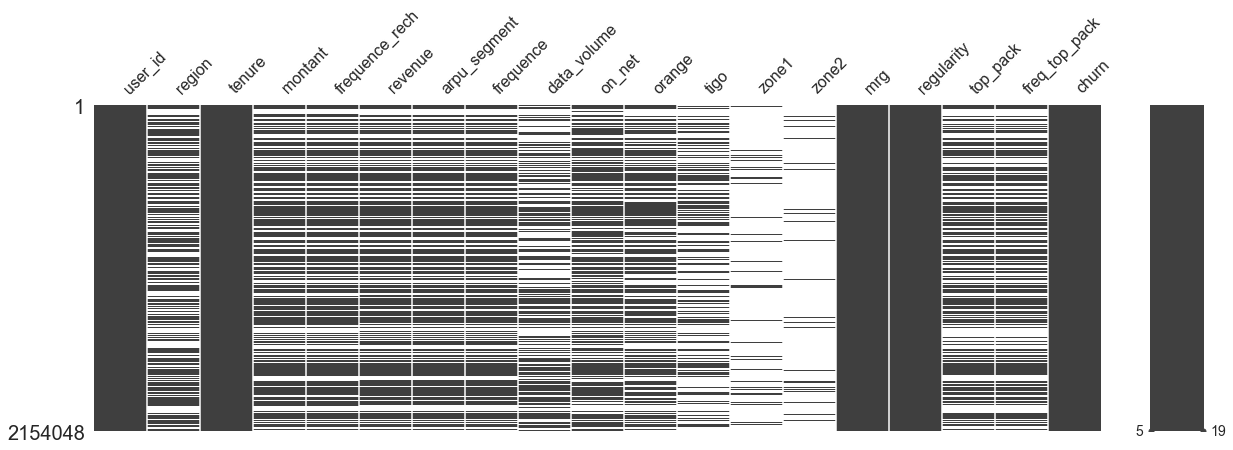

In [112]:
import missingno as mno

mno.matrix(train, figsize = (20, 6))

<AxesSubplot:>

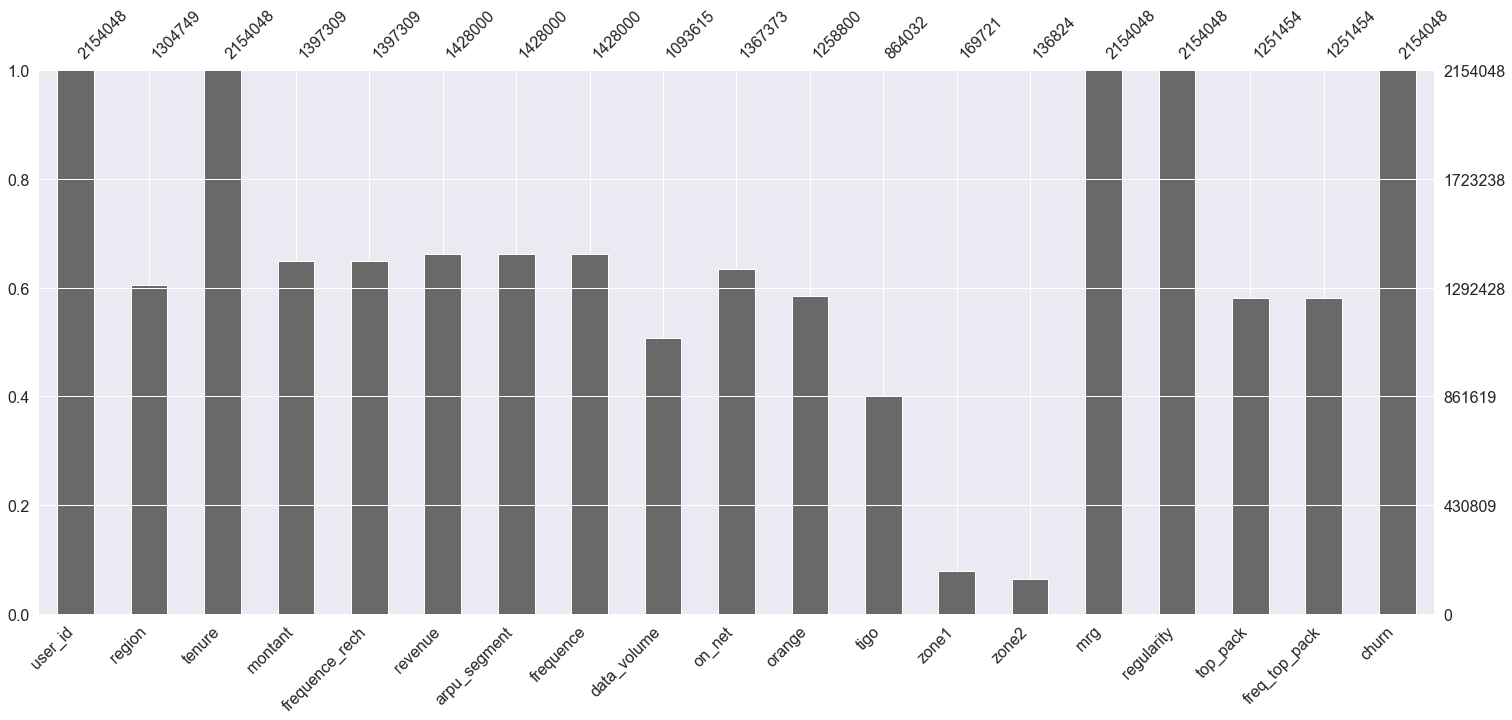

In [113]:
mno.bar(train)

<AxesSubplot:>

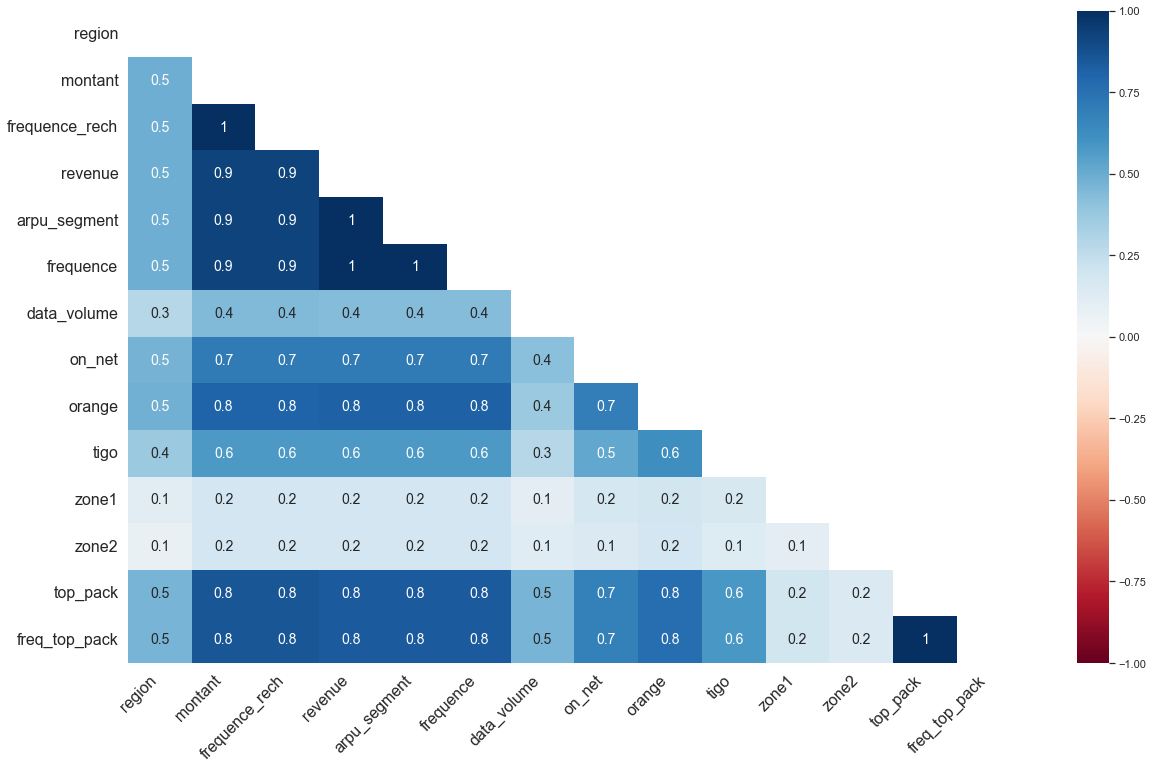

In [114]:
mno.heatmap(train)

Features "on_net", "Orange", "Tigo" express the number of calls to station and NaN values for these features can be filled by zeros (means user never connect to station).
For "Zone1" and "Zone2" more than 90% of data is missed and **correct solution is to drop them**.

For "frequent_rech", "revenue", "arpu_segment", "frequence" and "montant" most of the data is missing in the same rows. It makes sense to fill in the missing data using the same algorithm.

For other variables, if they do not have a high correlation with the dependent variable and their miss rate is above 50%, **it makes sense to drop them**.

### Determining cardinality in categorical variables

Text(0.5, 1.0, 'Cardinality')

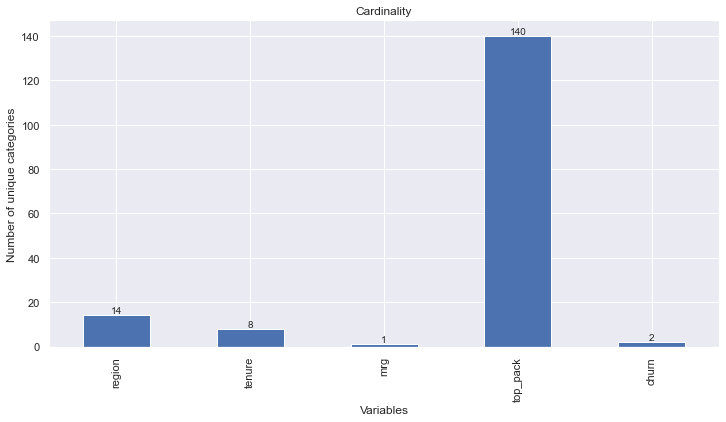

In [25]:
num_unique = train[['region', 'tenure', 'mrg', 'top_pack', 'churn']].nunique()
num_unique.plot.bar(figsize=(12,6))

for i in range(5):
    plt.text(i, num_unique[i], num_unique[i], ha='center', va='bottom')

plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

"mrg" feature has only one class so **it should be dropped**.

Dependent variable has two classes so it's **binary classification problem**.

A **high cardinality of "top_pack"** will be problem for encoding. If feature has correlation with target, we can hash or use embedding to encode.

### Pinpointing rare categories in categorical variables

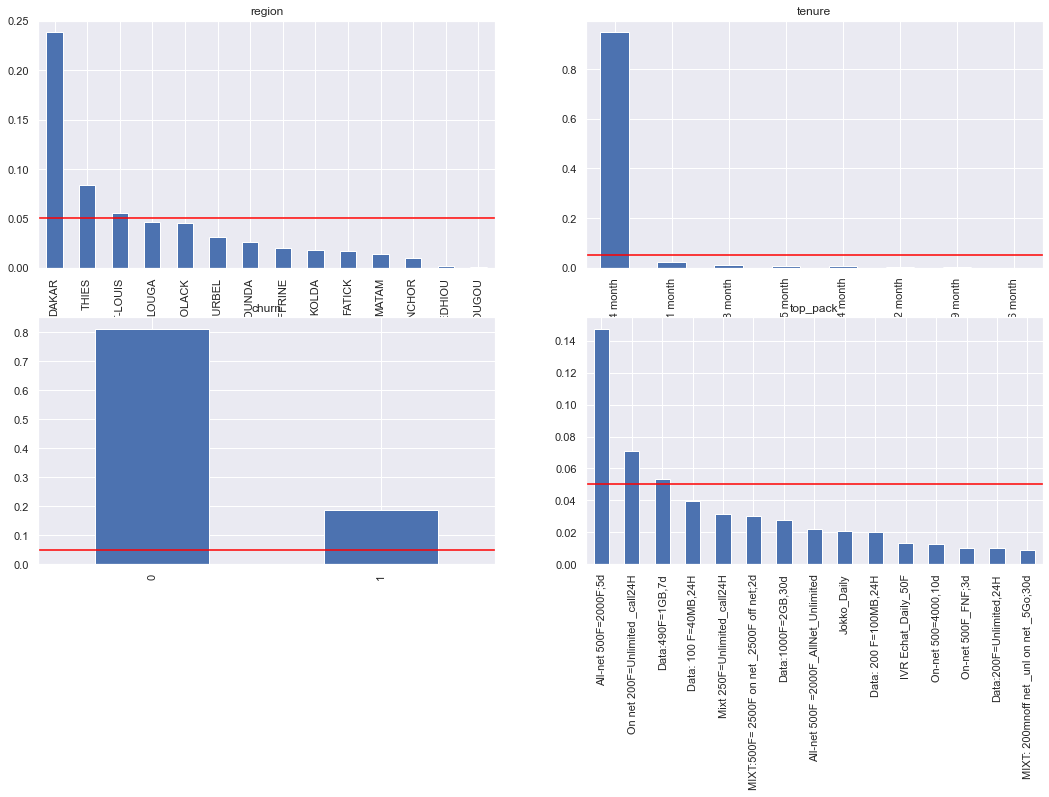

In [29]:
sns.set()
fig, axes = plt.subplots(2, 2, figsize=(18, 10))


label_freq = train['region'].value_counts() / len(train)
label_freq.sort_values(ascending=False).plot.bar(ax=axes[0,0]).set_title('region')
axes[0,0].axhline(y=0.05, color='red')

label_freq = train['tenure'].value_counts() / len(train)
label_freq.sort_values(ascending=False).plot.bar(ax=axes[0,1]).set_title('tenure')
axes[0,1].axhline(y=0.05, color='red')

label_freq = train['churn'].value_counts() / len(train)
label_freq.sort_values(ascending=False).plot.bar(ax=axes[1,0]).set_title('churn')
axes[1,0].axhline(y=0.05, color='red')

label_freq = train['top_pack'].value_counts() / len(train)
label_freq.sort_values(ascending=False).iloc[:15].plot.bar(ax=axes[1,1]).set_title('top_pack')
axes[1,1].axhline(y=0.05, color='red')

There is **an imbalance** for dependent variable. It makes sense to use Random Over/Undersampling.

Other variables show a wide distribution of 1-3 classes.

### Identifying a linear relationship

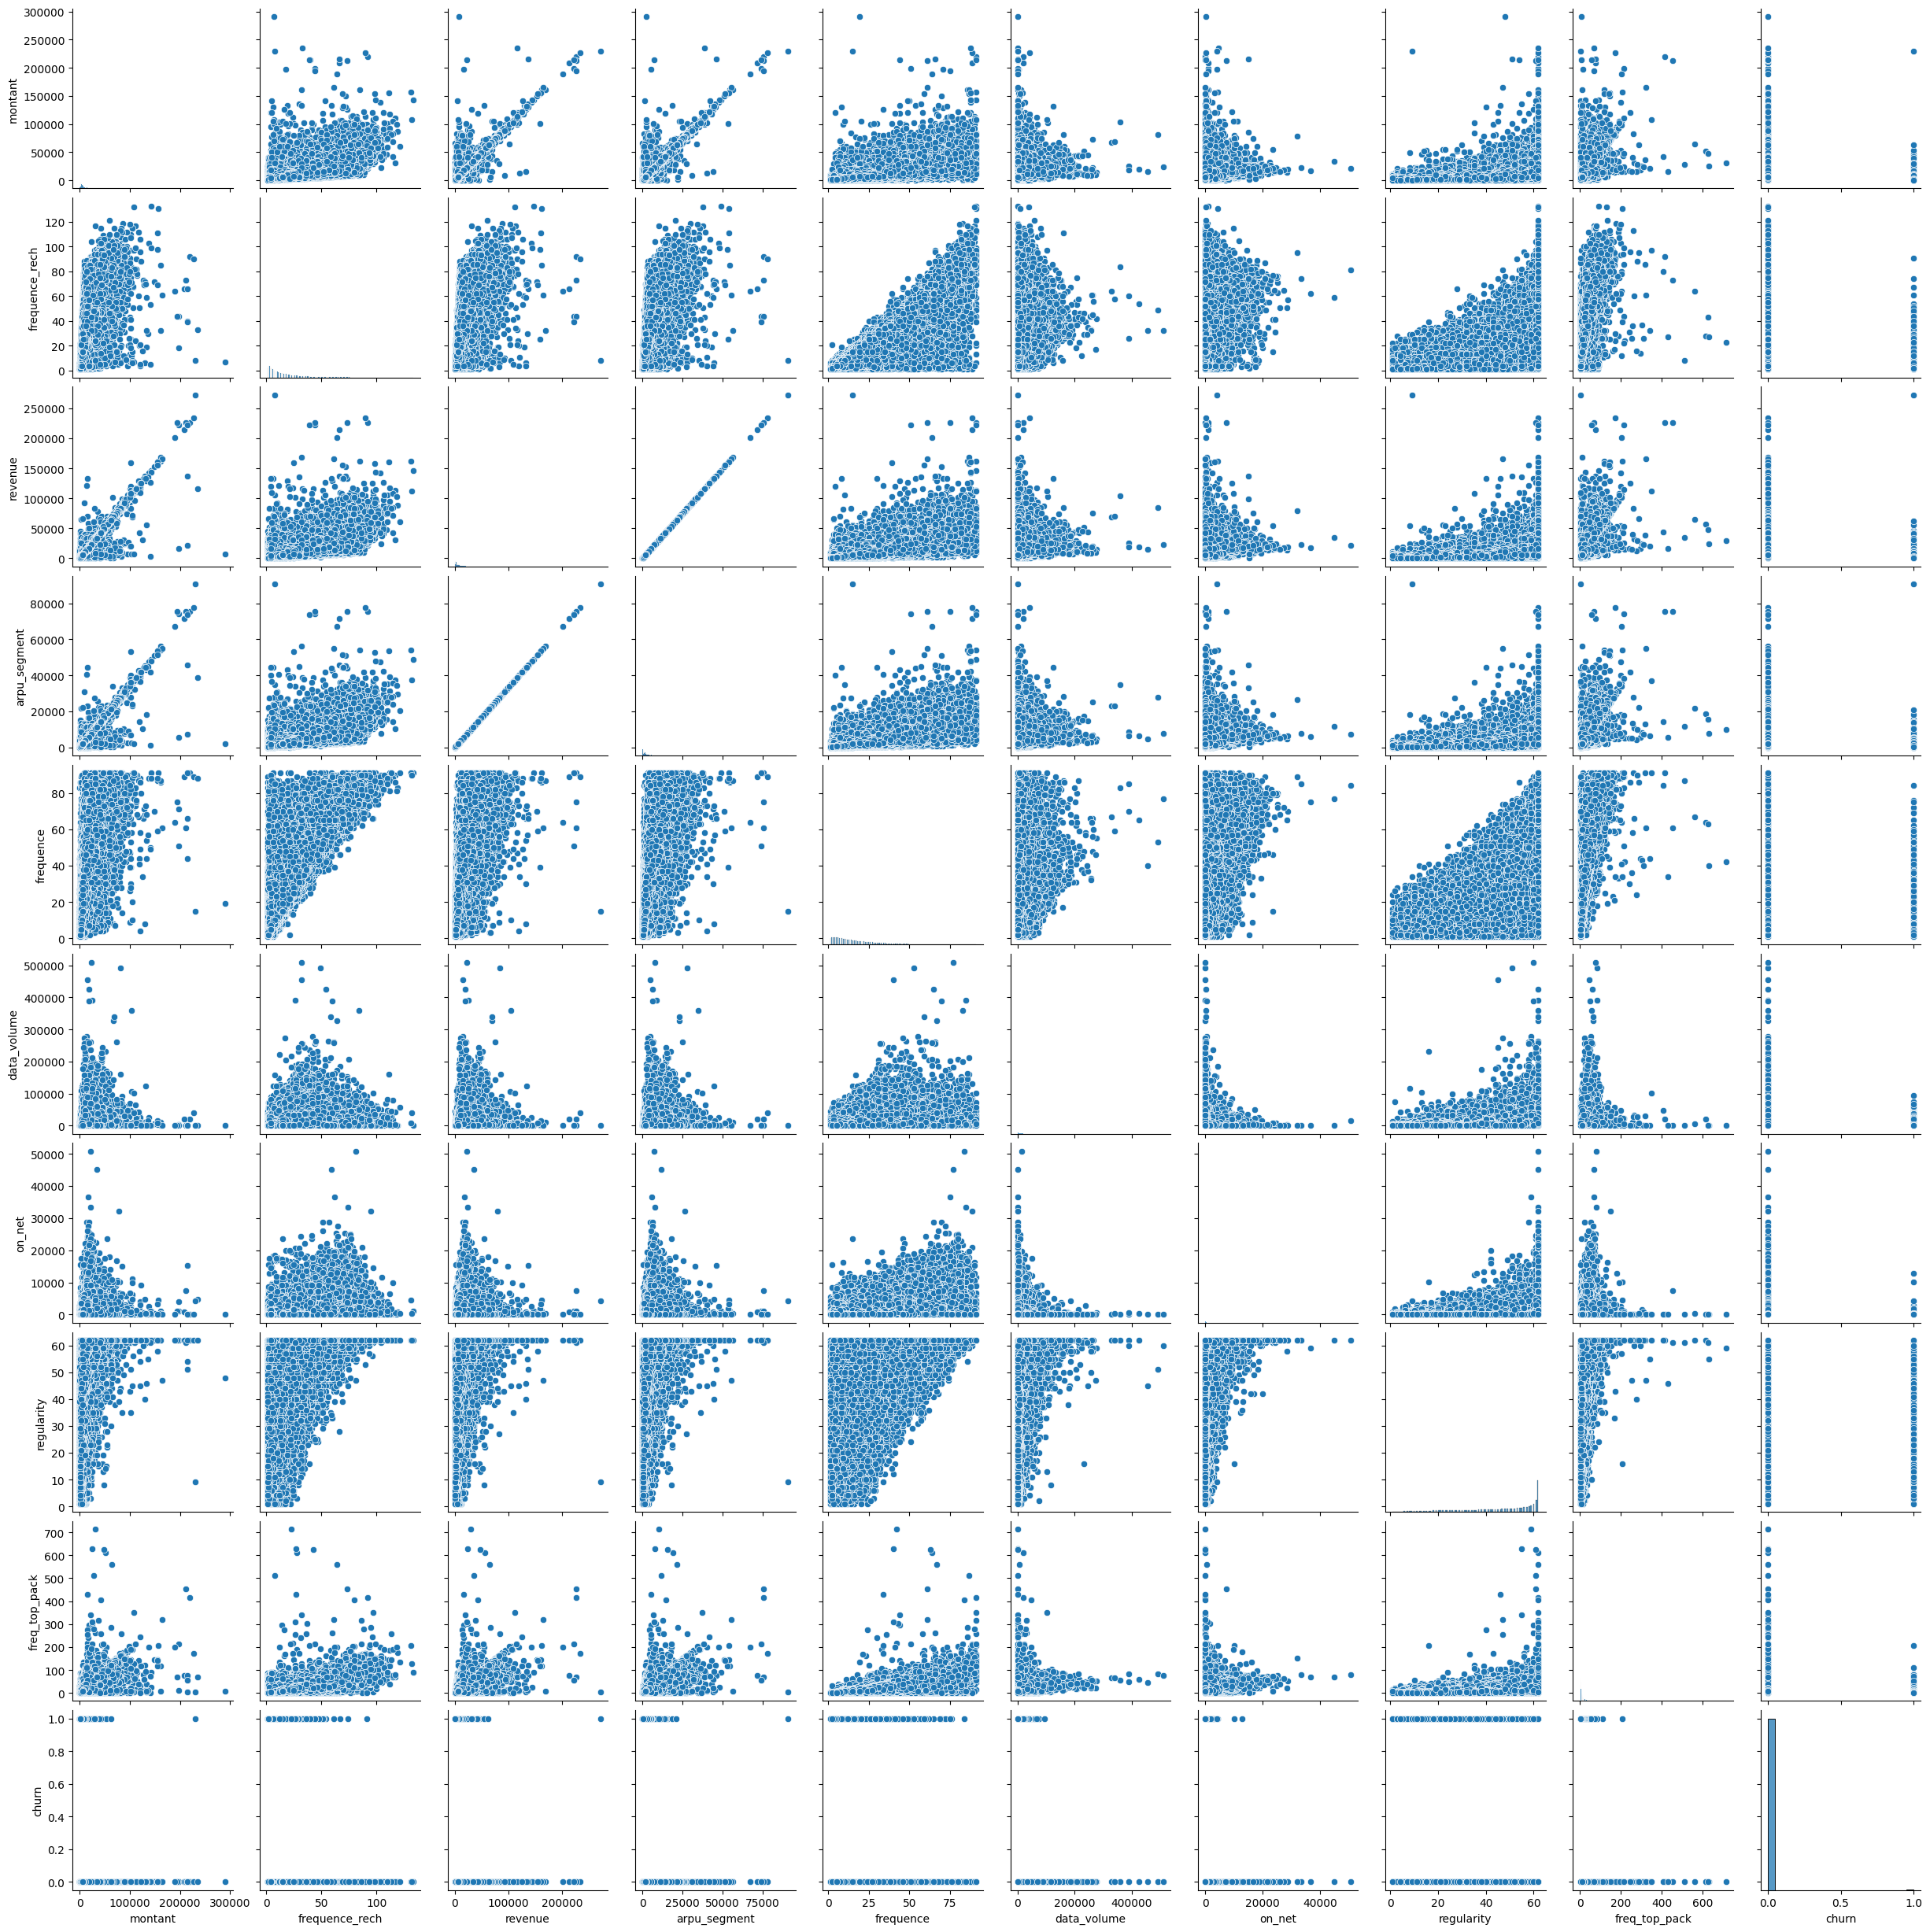

In [10]:
plt.rcParams['figure.figsize'] = (15, 15)
sns.pairplot(train.drop(['user_id', 'orange', 'tigo', 'zone1', 'zone2', 'mrg', 'top_pack'], axis=1).dropna())

<AxesSubplot:>

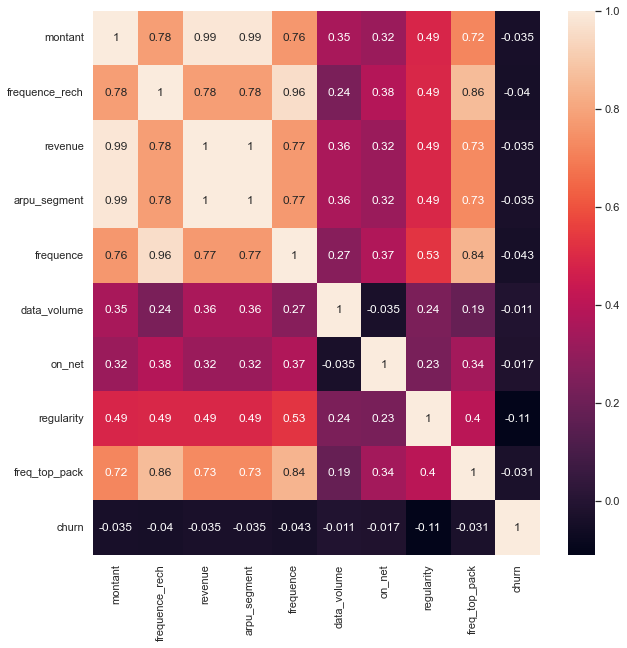

In [31]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(train.drop(['user_id', 'orange', 'tigo', 'zone1', 'zone2', 'mrg', 'top_pack'], axis=1).dropna().corr(), annot=True)

"Revenue", "Montant" and "arpu_segment" have correlation around 1, so we should **drop two of them**.

Also there is a **strong correlation** between "frequence", "freq_top_pack" and three features above. It can be explained as the more often a customer buys, the more profit is made.

Finally, there is **no correlation between target variable and others**.

### Highlighting outliers

Text(0.5, 1.0, 'freq_top_pack')

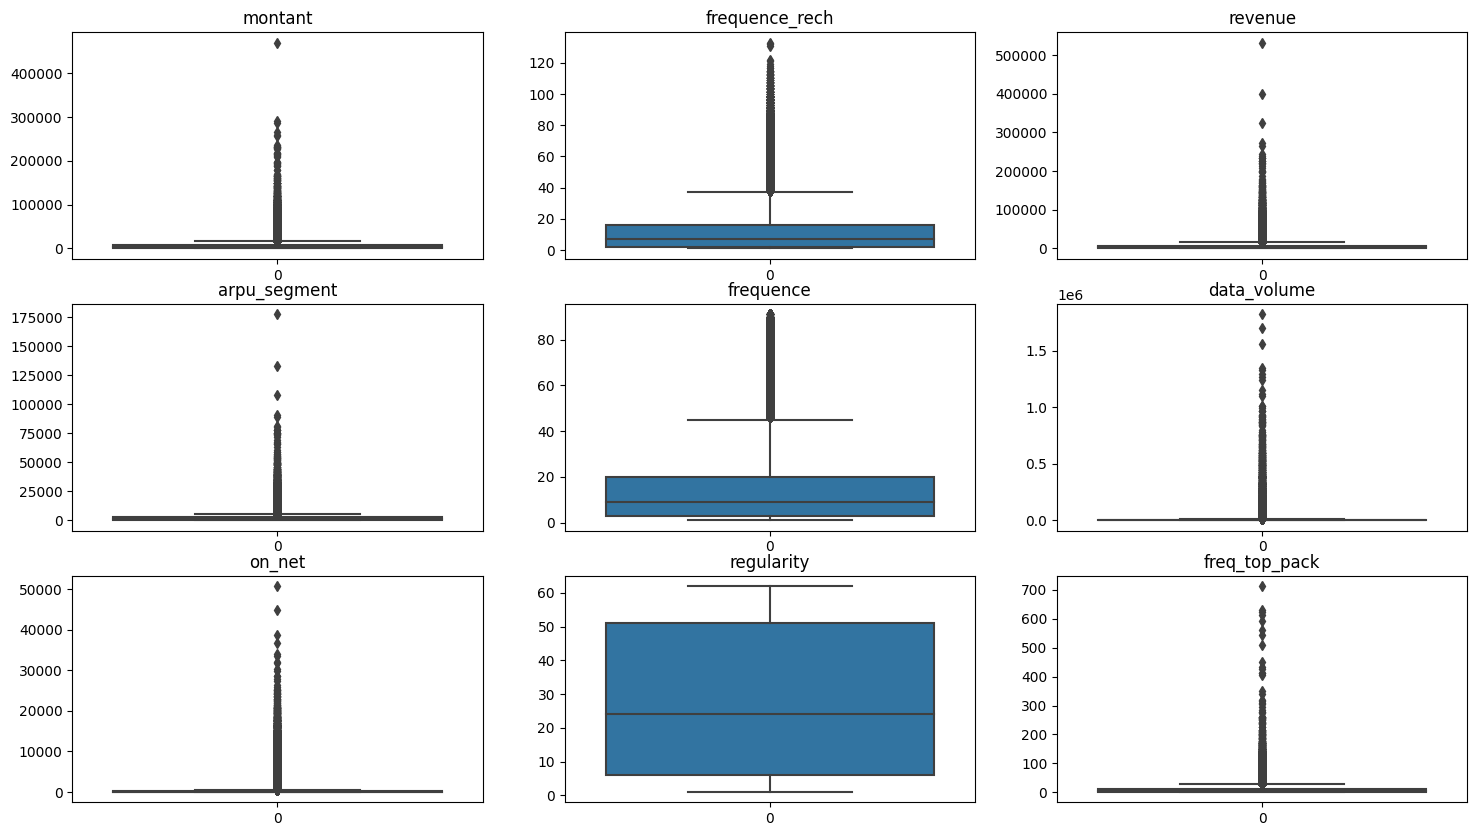

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

sns.boxplot(ax=axes[0, 0], data=train['montant'].dropna()).set_title('montant')
sns.boxplot(ax=axes[0, 1], data=train['frequence_rech'].dropna()).set_title('frequence_rech')
sns.boxplot(ax=axes[0, 2], data=train['revenue'].dropna()).set_title('revenue')
sns.boxplot(ax=axes[1, 0], data=train['arpu_segment'].dropna()).set_title('arpu_segment')
sns.boxplot(ax=axes[1, 1], data=train['frequence'].dropna()).set_title('frequence')
sns.boxplot(ax=axes[1, 2], data=train['data_volume'].dropna()).set_title('data_volume')
sns.boxplot(ax=axes[2, 0], data=train['on_net'].dropna()).set_title('on_net')
sns.boxplot(ax=axes[2, 1], data=train['regularity'].dropna()).set_title('regularity')
sns.boxplot(ax=axes[2, 2], data=train['freq_top_pack'].dropna()).set_title('freq_top_pack')

In [51]:
outliers=[]
columns = ['montant', 'frequence_rech', 'revenue', 'arpu_segment',
           'frequence', 'data_volume', 'on_net', 'regularity', 'freq_top_pack']

def detect_outlier(data_1):
    
    counter = 0
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            counter += 1
    return counter

for col in columns:
    outliers.append(detect_outlier(train[col]))
    
cost = np.round(train[columns].max() / train[columns].quantile(0.99), 2)
    
pd.DataFrame(np.array([columns, outliers, 100*np.array(outliers)/len(train), cost]).T,
             columns=['column', 'num_of_outliers', 'percentage', 'exceed'])

,column,num_of_outliers,percentage,exceed
0,montant,26326,1.2221640371987996,14.24
1,frequence_rech,31666,1.4700693763555872,2.15
2,revenue,27042,1.2554037793029682,15.97
3,arpu_segment,27041,1.2553573550821524,15.97
4,frequence,28750,1.3346963484564875,1.36
5,data_volume,8189,0.3801679442612235,48.9
6,on_net,26334,1.2225354309653267,11.86
7,regularity,0,0.0,1.0
8,freq_top_pack,26935,1.2504363876756692,12.08


As you can see, outliers make up an average of 1.3% of the total amount of data. However, in half of the cases, the outlier value exceeds the normal value (99% quantile) by dozens of times.

### Comparing feature magnitude

In [52]:
np.round((train.describe().loc[['max'], :].rename({'max':'magnitude'}).T
          - train.describe().loc[['min'], :].T.to_numpy()).merge(train.describe().loc[['mean'], :].T,
                                                                 left_index=True, right_index=True), 3)

,magnitude,mean
montant,469990.0,5532.117
frequence_rech,132.0,11.529
revenue,532176.0,5510.810
arpu_segment,177392.0,1836.943
frequence,90.0,13.978
data_volume,1823866.0,3366.450
on_net,50809.0,277.689
orange,21323.0,95.419
tigo,4174.0,23.109
zone1,4792.0,8.170


As you can see in the table above, the spread of values can reach several million. In this case, before building models (especially those using Stochastic/Batched Gradient Descent and regularization), it is necessary to perform normalization. For algorithm it is possible to take simple MinMax normalization.

## Conclusion

- There are 6 categorical and 13 numerical features. 
- The majority of variables have non-symmetric right-skewed distribution. 
- Presence of critical outliers for each variable. 
- On average, independent features have 30% of missed values. Two of them should be dropped(90% missed). 
- The dependent variable has two classes. For one feature there is a problem of high cardinality.
- For categorical variables, there are 2-3 wide distributed classes when the rest of them have <5% distribution.
- For three variables there is a full correlation and two of them should be dropped.
- There is no correlation between the dependent variable and others.
- On average, data contains 1.3% of outliers, but some of them exceed normal value by dozen of times.

# END EDA

As we can see from the above, in 'sample' dataset all of the values for churn is 0. If all the target values in our test dataset will be 0, that wouldn't make any sense. That is why, we need to merge all these dataframes. Merge will be done by 'user_id'.

In [8]:
df1 = pd.merge(test, sample, on="user_id")
df1.head()

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,churn
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN,0


Concatenate two tables.

In [9]:
frames = [train, df1]
data = pd.concat(frames)
data.head()

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,churn
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


Sizes of our final dataset.

In [10]:
data.shape

(2534175, 19)

Checking for null values in the dataset.

In [11]:
data.isnull().sum()

user_id                 0
region             999027
tenure                  0
montant            889794
frequence_rech     889794
revenue            853421
arpu_segment       853421
frequence          853421
data_volume       1247473
on_net             925189
orange            1052478
tigo              1517017
zone1             2334593
zone2             2373275
mrg                     0
regularity              0
top_pack          1061373
freq_top_pack     1061373
churn                   0
dtype: int64

In [12]:
# x = data.churn.value_counts().values
# sns.barplot([0,1], x).set_title('Target variable count');
# plt.title('Target variable count')

## Checking for Imbalance

In [13]:
print(data.churn.value_counts())

0    2130189
1     403986
Name: churn, dtype: int64


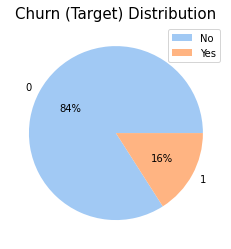

In [14]:
size = data.churn.value_counts()
labels = data.churn.value_counts().index
label=['No', 'Yes']
y = np.array(size)

colors = sns.color_palette('pastel')[0:2]
plt.pie(size, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(label)
plt.title('Churn (Target) Distribution', fontsize=15)
plt.show()

## [models](https://www.kaggle.com/code/yasserhessein/airline-passenger-eda-7-algorithms-accuracy97)<br>
## [telecom project](https://www.kaggle.com/code/semihizinli/churn-telecom-project#3-|-Basic-Data-Analysis)

## Missing values

In [15]:
# Features with missing values
missing = data.isnull().sum().sort_values(ascending = False).head(20)
miss_percent = (missing/len(data))*100

# Percentage of missing values
pd.DataFrame({'missing values number': missing, '% of missing data': miss_percent.values})

,missing values number,% of missing data
zone2,2373275,93.650794
zone1,2334593,92.124380
tigo,1517017,59.862362
data_volume,1247473,49.226001
freq_top_pack,1061373,41.882388
top_pack,1061373,41.882388
orange,1052478,41.531386
region,999027,39.422179
on_net,925189,36.508489
montant,889794,35.111782


Installing 'missingno' package.<br>
__missingno__ - missing data visualization module for Python.

In [17]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

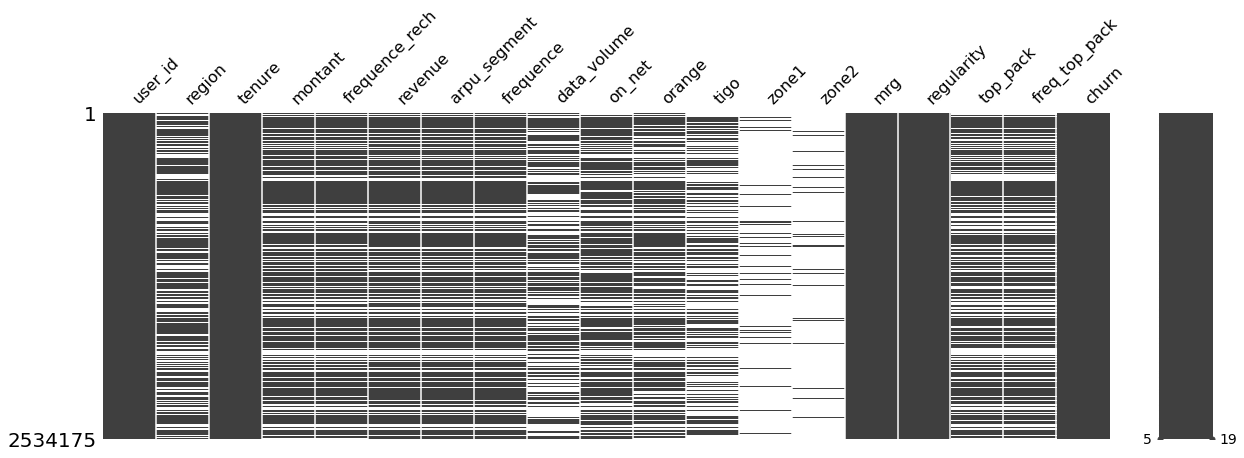

In [16]:
import missingno as mno

mno.matrix(data, figsize = (20, 6))

<AxesSubplot:>

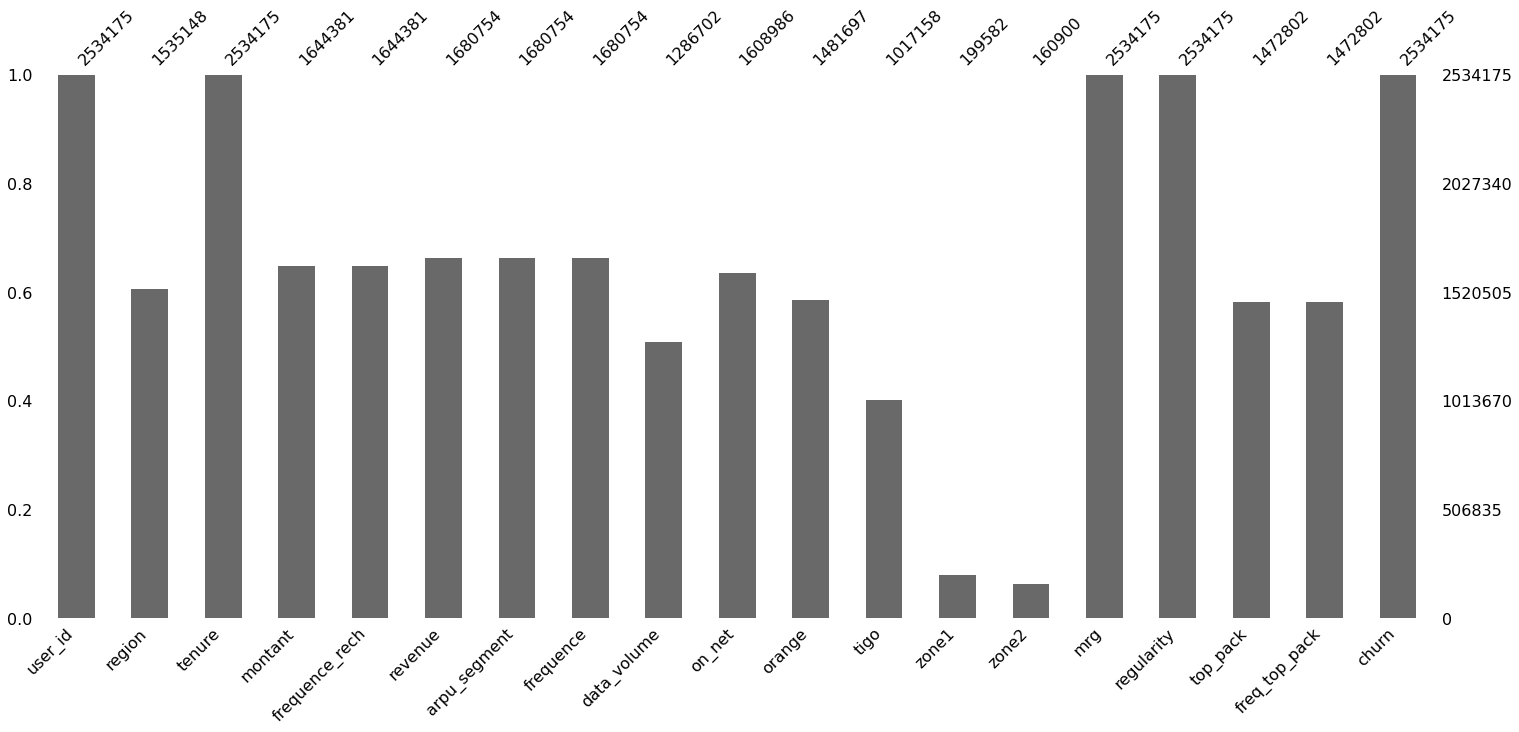

In [17]:
mno.bar(data)

<AxesSubplot:>

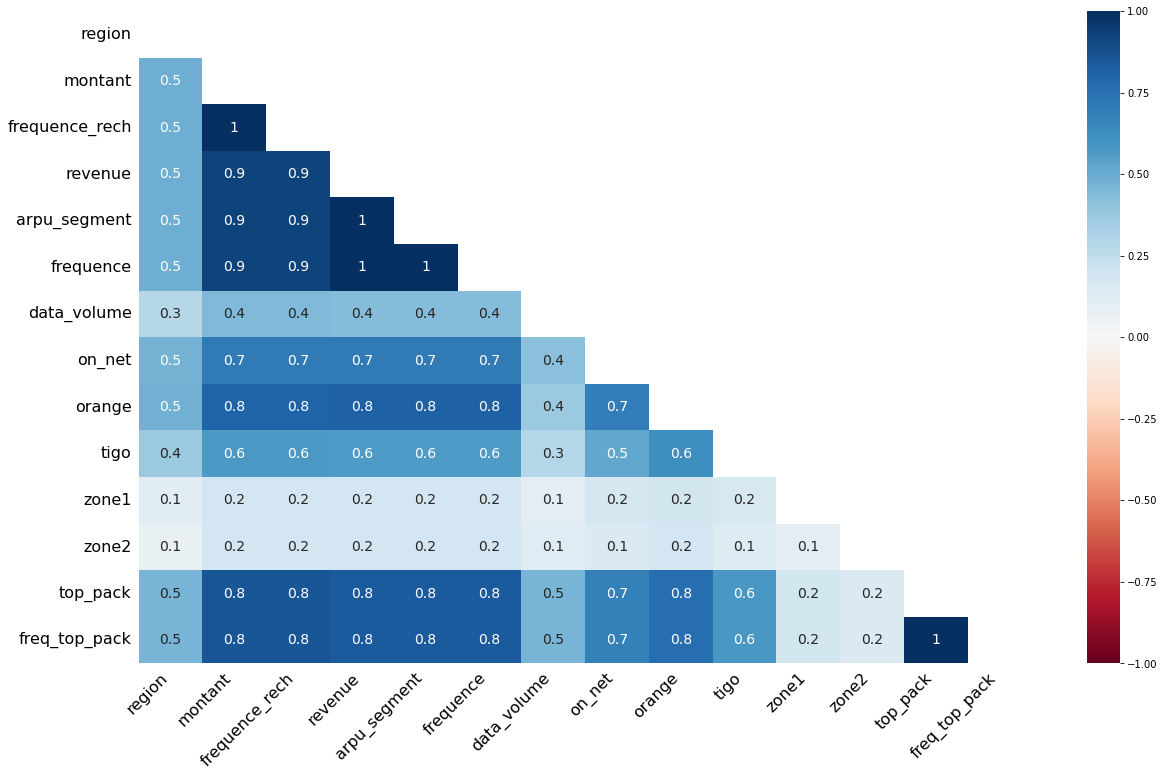

In [18]:
mno.heatmap(data)

The __heatmap function__ shows that there are strong correlations between missing values of different features. <br>
Low correlations indicate that the data are MAR(Missing at random).

<AxesSubplot:>

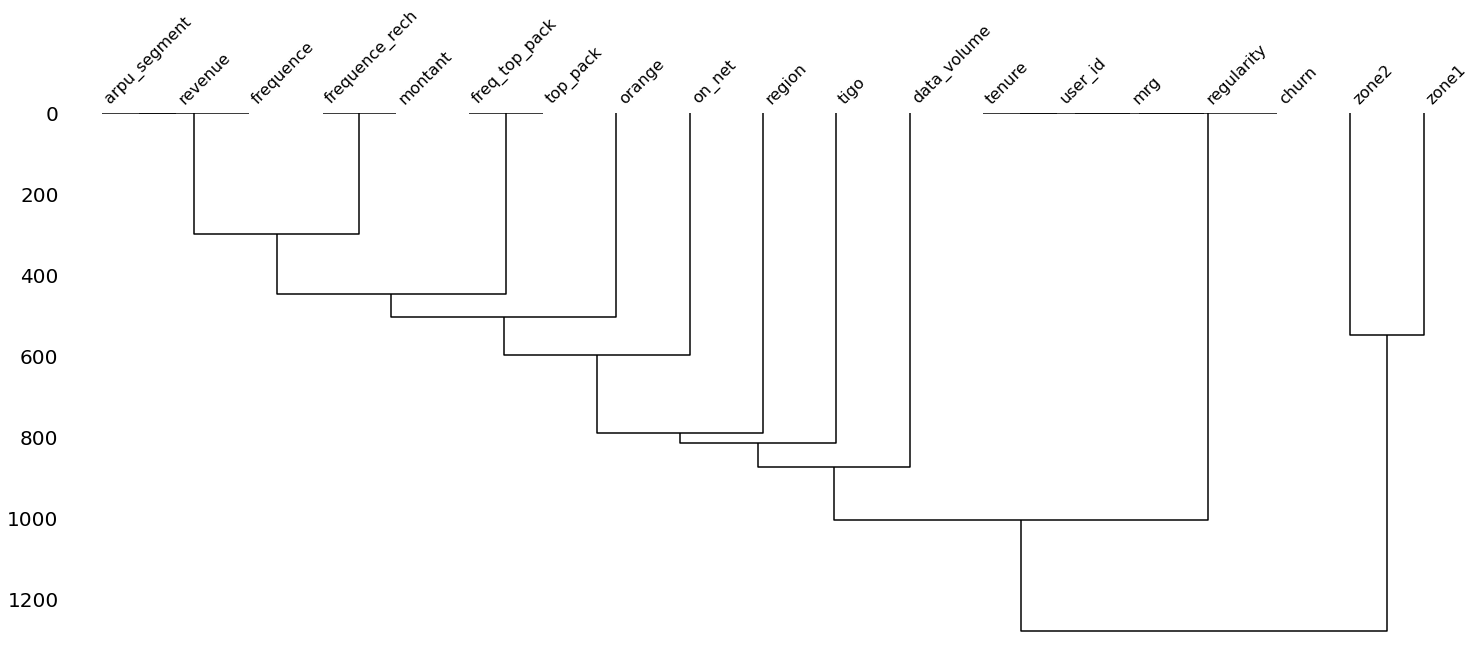

In [19]:
mno.dendrogram(data)

- Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on(missingno documentation)
- The missingness of __'on_net'__ tends to be more similar to __'orange'__ than to __'region'__ and so on. 

In [20]:
# dropping these 3 columns, because absense in these columns is correlated with absense in other columns
data.dropna(subset=['arpu_segment', 'revenue', 'frequence'], how = 'all', inplace=True)
data.shape

(1680754, 19)

<AxesSubplot:>

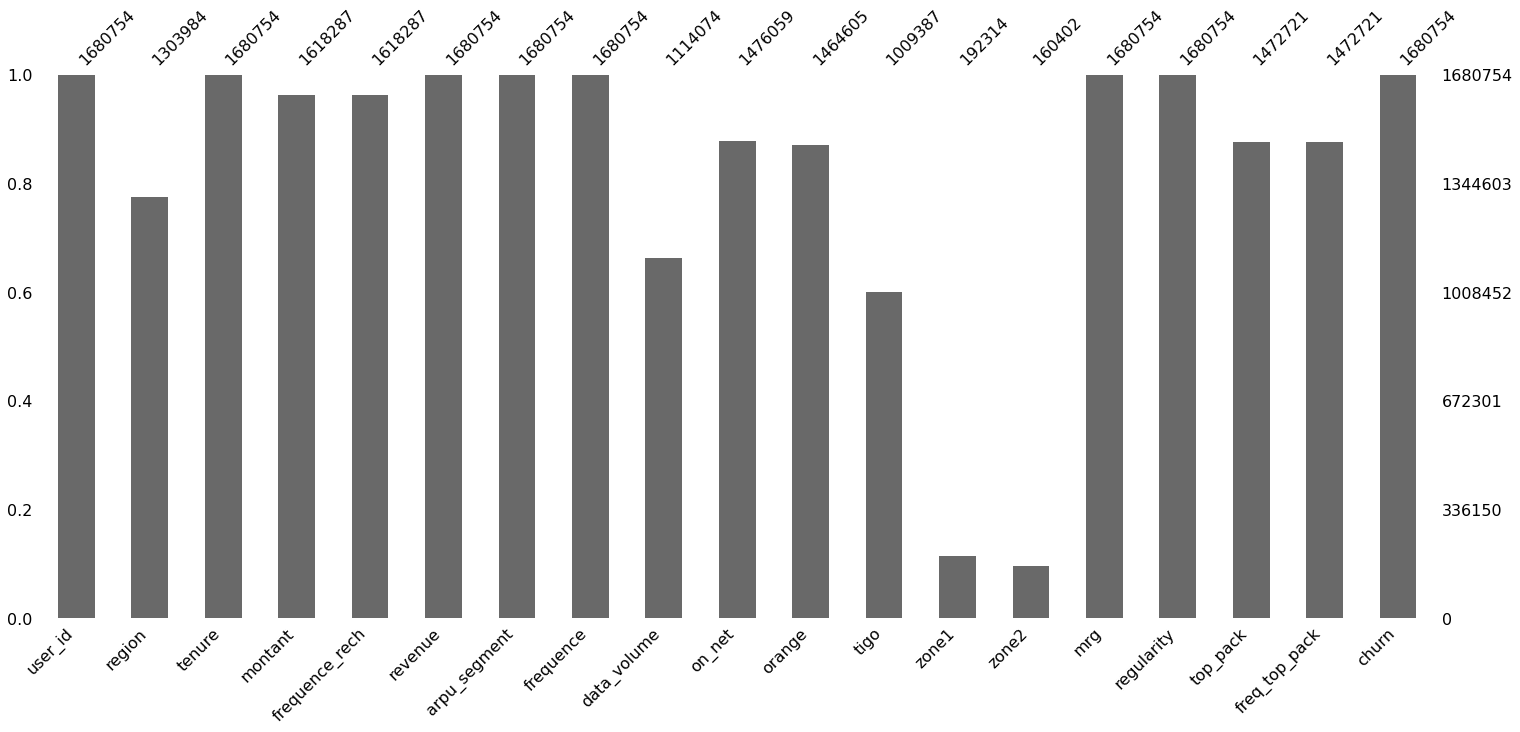

In [21]:
mno.bar(data)

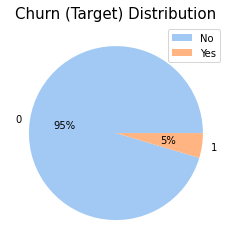

0    1603561
1      77193
Name: churn, dtype: int64


In [22]:
size = data.churn.value_counts()
labels = data.churn.value_counts().index
label=['No', 'Yes']
y = np.array(size)

colors = sns.color_palette('pastel')[0:2]
plt.pie(size, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(label)
plt.title('Churn (Target) Distribution', fontsize=15)
plt.show()

print(data.churn.value_counts())

__Comment:__ As you can see, the target imbalance percentages has changed.

Percentages of missing values in 'zone1' and 'zone2' columns are greater than 90%. For that reason, we can drop those columns.<br>
Also 'user_id' column can be dropped, because it doesn't hold any crucial information, however we will use it later to merge tables.

In [23]:
data.drop(columns=['zone1', 'zone2'], axis=1, inplace=True)

In [24]:
# import seaborn as sns
# sns.pairplot(data)

## Correlation with other columns

In [25]:
data.corr()

,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,freq_top_pack,churn
montant,1.000000,0.790971,0.977077,0.977077,0.775424,0.300683,0.326491,0.658026,0.412533,0.518499,0.741025,-0.086068
frequence_rech,0.790971,1.000000,0.799879,0.799878,0.956089,0.152658,0.404968,0.518861,0.342987,0.552838,0.868894,-0.102603
revenue,0.977077,0.799879,1.000000,1.000000,0.785456,0.306957,0.331883,0.660904,0.412403,0.532010,0.750907,-0.104635
arpu_segment,0.977077,0.799878,1.000000,1.000000,0.785455,0.306957,0.331883,0.660905,0.412403,0.532008,0.750907,-0.104635
frequence,0.775424,0.956089,0.785456,0.785455,1.000000,0.169376,0.395269,0.471795,0.307009,0.591286,0.844751,-0.127918
data_volume,0.300683,0.152658,0.306957,0.306957,0.169376,1.000000,-0.023181,0.062469,0.022963,0.176390,0.118645,-0.010926
on_net,0.326491,0.404968,0.331883,0.331883,0.395269,-0.023181,1.000000,0.221391,0.137290,0.261084,0.356398,-0.042981
orange,0.658026,0.518861,0.660904,0.660905,0.471795,0.062469,0.221391,1.000000,0.405083,0.308927,0.553588,-0.057707
tigo,0.412533,0.342987,0.412403,0.412403,0.307009,0.022963,0.137290,0.405083,1.000000,0.193038,0.369002,-0.032287
regularity,0.518499,0.552838,0.532010,0.532008,0.591286,0.176390,0.261084,0.308927,0.193038,1.000000,0.446004,-0.278262


**'revenue'** and **'arpu_segment'** columns correlation is 1, that is why I can drop one of them.

In [26]:
data.drop(columns=['arpu_segment'], axis=1, inplace=True)

Get Correlation of "churn" column with other variables.

In [27]:
c = data.corr()['churn'].abs()
sc = c.sort_values()
a = dict(sc.tail(40))
b = a.keys()

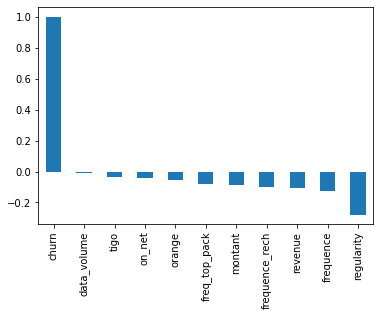

In [28]:
# fig = plt.figure(figsize=(15,8))
data[b].corr()['churn'].sort_values(ascending = False).plot(kind='bar');
# plt.show()

The greatest correlation between target variable and __'regularity'__ column. The followings are 'frequence', 'revenue', 'frequence_rech' and so on.

In [29]:
data.nunique()

user_id           1680754
region                 14
tenure                  8
montant              7223
frequence_rech        126
revenue             39742
frequence              91
data_volume         43850
on_net              10320
orange               3283
tigo                 1376
mrg                     1
regularity             62
top_pack              142
freq_top_pack         257
churn                   2
dtype: int64

We can drop __'mrg'__ column because there is only one unique value.

In [30]:
data.drop(columns=['mrg'], axis=1, inplace=True)
data.shape

(1680754, 15)

In [32]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [33]:
import lightgbm as lgb

In [34]:
params = {
   "monotone_constraints": [-1, 0, 1]
}

## Filling Missing values
### Multivariate feature imputation

A more sophisticated [approach](https://scikit-learn.org/stable/modules/impute.html) is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

__Note__ This estimator is still experimental for now: default parameters or details of behaviour might change without any deprecation cycle. 

In [32]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["tenure1"] = ord_enc.fit_transform(data[["tenure"]])
data[["tenure1", "tenure"]].head(10)

,tenure1,tenure
0,7.0,K > 24 month
2,7.0,K > 24 month
3,7.0,K > 24 month
4,7.0,K > 24 month
5,7.0,K > 24 month
7,7.0,K > 24 month
8,7.0,K > 24 month
9,7.0,K > 24 month
11,7.0,K > 24 month
13,7.0,K > 24 month


### 'frequence_rech' and 'montant' columns

In [33]:
cols = ['tenure1', 'regularity', 'frequence', 'revenue', 'frequence_rech', 'montant']
X = data[cols]
X

,tenure1,regularity,frequence,revenue,frequence_rech,montant
0,7.0,54,17.0,4251.0,15.0,4250.0
2,7.0,17,2.0,1020.0,2.0,3600.0
3,7.0,62,18.0,13502.0,15.0,13500.0
4,7.0,11,1.0,985.0,1.0,1000.0
5,7.0,62,18.0,9000.0,17.0,8500.0
...,...,...,...,...,...,...
380120,7.0,52,7.0,3299.0,7.0,3300.0
380121,7.0,50,38.0,4915.0,28.0,4700.0
380122,7.0,53,8.0,3999.0,8.0,4000.0
380124,7.0,15,10.0,3949.0,7.0,3950.0


In [34]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [35]:
impute_it = IterativeImputer(max_iter=10, random_state=42)
impute_it = impute_it.fit_transform(X)
k = pd.DataFrame(impute_it, columns=cols)
k.head()

,tenure1,regularity,frequence,revenue,frequence_rech,montant
0,7.0,54.0,17.0,4251.0,15.0,4250.0
1,7.0,17.0,2.0,1020.0,2.0,3600.0
2,7.0,62.0,18.0,13502.0,15.0,13500.0
3,7.0,11.0,1.0,985.0,1.0,1000.0
4,7.0,62.0,18.0,9000.0,17.0,8500.0


Renaming columns because later when we merge them with 'data' dataframe, problems won't appear.

In [36]:
k = k.rename({'frequence_rech': 'frequence_rech1'}, axis=1)
k = k.rename({'montant': 'montant1'}, axis=1)
data.head()

,user_id,region,tenure,montant,frequence_rech,revenue,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,tenure1
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,54,On net 200F=Unlimited _call24H,8.0,0,7.0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,2.0,NaN,90.0,46.0,7.0,17,On-net 1000F=10MilF;10d,1.0,0,7.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,18.0,43804.0,41.0,102.0,2.0,62,"Data:1000F=5GB,7d",11.0,0,7.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,1.0,NaN,39.0,24.0,NaN,11,Mixt 250F=Unlimited_call24H,2.0,0,7.0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,18.0,NaN,252.0,70.0,91.0,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0,7.0


In [37]:
data.reset_index(inplace=True)
data.head()

,index,user_id,region,tenure,montant,frequence_rech,revenue,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,tenure1
0,0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,54,On net 200F=Unlimited _call24H,8.0,0,7.0
1,2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,2.0,NaN,90.0,46.0,7.0,17,On-net 1000F=10MilF;10d,1.0,0,7.0
2,3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,18.0,43804.0,41.0,102.0,2.0,62,"Data:1000F=5GB,7d",11.0,0,7.0
3,4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,1.0,NaN,39.0,24.0,NaN,11,Mixt 250F=Unlimited_call24H,2.0,0,7.0
4,5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,18.0,NaN,252.0,70.0,91.0,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0,7.0


In [38]:
data.drop(columns=['index'], inplace=True)

In [39]:
extracted_col = k[["frequence_rech1", 'montant1']]
data = data.merge(extracted_col, left_index=True, right_index=True)
data.head(5)

,user_id,region,tenure,montant,frequence_rech,revenue,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,tenure1,frequence_rech1,montant1
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,54,On net 200F=Unlimited _call24H,8.0,0,7.0,15.0,4250.0
1,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,2.0,NaN,90.0,46.0,7.0,17,On-net 1000F=10MilF;10d,1.0,0,7.0,2.0,3600.0
2,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,18.0,43804.0,41.0,102.0,2.0,62,"Data:1000F=5GB,7d",11.0,0,7.0,15.0,13500.0
3,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,1.0,NaN,39.0,24.0,NaN,11,Mixt 250F=Unlimited_call24H,2.0,0,7.0,1.0,1000.0
4,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,18.0,NaN,252.0,70.0,91.0,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0,7.0,17.0,8500.0


In [40]:
data.drop(columns=['frequence_rech', 'montant'], inplace=True)

<AxesSubplot:>

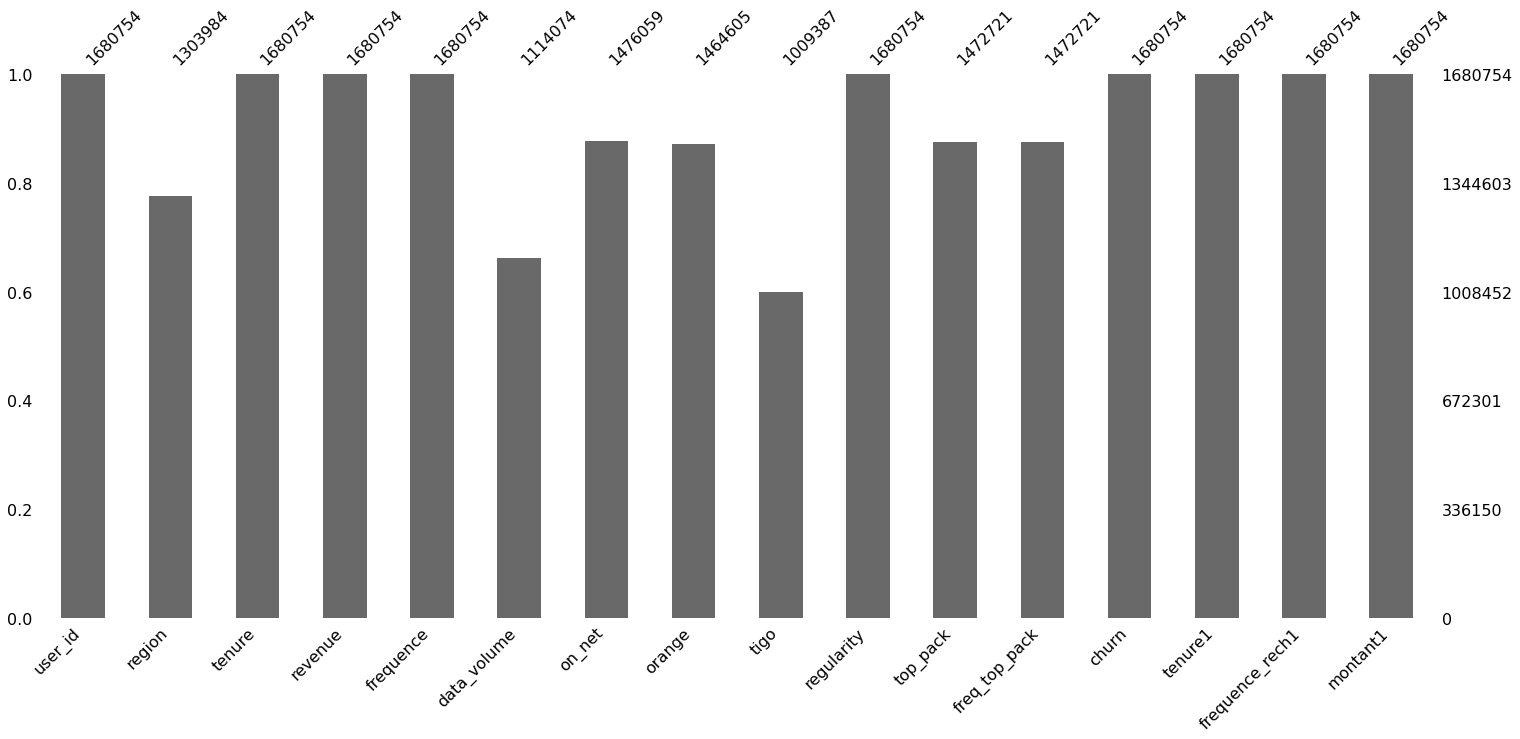

In [41]:
mno.bar(data)

In [42]:
data['top_pack']=data['top_pack'].factorize()[0]
# -1 is nan values in 'top_pack'
data['top_pack'].replace({-1: np.nan }, inplace=True)

### 'top_pack' and 'freq_top_pack' columns

In [43]:
cols = ['regularity', 'frequence', 'top_pack', 'freq_top_pack']
X2 = data[cols]

In [44]:
impute_it2 = IterativeImputer(max_iter=10, random_state=42)
impute_it2 = impute_it2.fit_transform(X2)
m = pd.DataFrame(impute_it2, columns=cols)
m.rename({'top_pack': 'top_pack1'}, axis=1, inplace=True)
m.rename({'freq_top_pack': 'freq_top_pack1'}, axis=1, inplace=True)
m

,regularity,frequence,top_pack1,freq_top_pack1
0,54.0,17.0,0.0,8.0
1,17.0,2.0,1.0,1.0
2,62.0,18.0,2.0,11.0
3,11.0,1.0,3.0,2.0
4,62.0,18.0,4.0,18.0
...,...,...,...,...
1680749,52.0,7.0,5.0,4.0
1680750,50.0,38.0,7.0,33.0
1680751,53.0,8.0,3.0,5.0
1680752,15.0,10.0,15.0,6.0


In [45]:
extracted_col = m[["top_pack1", 'freq_top_pack1']]
data = data.merge(extracted_col, on=data.user_id)

In [46]:
data.drop(columns=['top_pack', 'freq_top_pack'], axis=1, inplace=True)
data.isnull().sum()

key_0                   0
user_id                 0
region             376770
tenure                  0
revenue                 0
frequence               0
data_volume        566680
on_net             204695
orange             216149
tigo               671367
regularity              0
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
top_pack1               0
freq_top_pack1          0
dtype: int64

## hhhhhhhhhhhhhhhh

In [47]:
data.drop(columns=['user_id', 'tenure'], inplace=True)

In [49]:
data.isnull().sum()

key_0                   0
region             376770
revenue                 0
frequence               0
data_volume        566680
on_net             204695
orange             216149
tigo               671367
regularity              0
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
top_pack1               0
freq_top_pack1          0
dtype: int64

## START HERE

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
list1=['data_volume', 'on_net', 'orange', 'tigo', 'key_0', 'region']
testdf = data[data['data_volume'].isnull()==True]
traindf = data[data['data_volume'].isnull()==False]
y = traindf['data_volume']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['data_volume']= pred

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-52-85bc96196d79>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['data_volume']= pred


In [53]:
len(pred)

566680

In [54]:
df_out = pd.merge(traindf,y,how = 'left',left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf]
result = pd.concat(frames)
data = pd.merge(data,result['data_volume'], how = 'left',left_index = True, right_index = True) 

In [55]:
data

,key_0,region,revenue,frequence,data_volume_x,on_net,orange,tigo,regularity,churn,tenure1,frequence_rech1,montant1,top_pack1,freq_top_pack1,data_volume_y
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,4251.0,17.0,4.0,388.0,46.0,1.0,54,0,7.0,15.0,4250.0,0.0,8.0,4.000000
1,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,1020.0,2.0,NaN,90.0,46.0,7.0,17,0,7.0,2.0,3600.0,1.0,1.0,-541.698083
2,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,13502.0,18.0,43804.0,41.0,102.0,2.0,62,0,7.0,15.0,13500.0,2.0,11.0,43804.000000
3,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,985.0,1.0,NaN,39.0,24.0,NaN,11,0,7.0,1.0,1000.0,3.0,2.0,-628.596271
4,0000296564272665ccd2925d377e124f3306b01e,LOUGA,9000.0,18.0,NaN,252.0,70.0,91.0,62,0,7.0,17.0,8500.0,4.0,18.0,4525.938982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680749,fffe5c84e3db939182ee2a3a3123920025eca8a3,SAINT-LOUIS,3299.0,7.0,NaN,80.0,80.0,NaN,52,0,7.0,7.0,3300.0,5.0,4.0,2372.815877
1680750,fffe7c538a7d66446ee6f66c0b11b5446ec1be68,MATAM,4915.0,38.0,3942.0,1.0,2.0,NaN,50,0,7.0,28.0,4700.0,7.0,33.0,3942.000000
1680751,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,3999.0,8.0,1587.0,26.0,250.0,1.0,53,0,7.0,8.0,4000.0,3.0,5.0,1587.000000
1680752,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,3949.0,10.0,1724.0,25.0,71.0,NaN,15,0,7.0,7.0,3950.0,15.0,6.0,1724.000000


In [56]:
data.isnull().sum()

key_0                   0
region             376770
revenue                 0
frequence               0
data_volume_x      566680
on_net             204695
orange             216149
tigo               671367
regularity              0
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
top_pack1               0
freq_top_pack1          0
data_volume_y           0
dtype: int64

## 'on_net' column

In [57]:
lr = LinearRegression()
list1=['data_volume_x', 'on_net', 'orange', 'tigo', 'key_0', 'region']
testdf = data[data['on_net'].isnull()==True]
traindf = data[data['on_net'].isnull()==False]
y = traindf['on_net']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['on_net']= pred

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-57-9850f31561f1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['on_net']= pred


In [58]:
traindf.head(15)

,revenue,frequence,regularity,churn,tenure1,frequence_rech1,montant1,top_pack1,freq_top_pack1,data_volume_y
0,4251.0,17.0,54,0,7.0,15.0,4250.0,0.000000,8.000000,4.000000
1,1020.0,2.0,17,0,7.0,2.0,3600.0,1.000000,1.000000,-541.698083
2,13502.0,18.0,62,0,7.0,15.0,13500.0,2.000000,11.000000,43804.000000
3,985.0,1.0,11,0,7.0,1.0,1000.0,3.000000,2.000000,-628.596271
4,9000.0,18.0,62,0,7.0,17.0,8500.0,4.000000,18.000000,4525.938982
5,7229.0,22.0,55,0,7.0,16.0,7000.0,5.000000,8.000000,1601.000000
6,1502.0,12.0,31,0,7.0,3.0,1500.0,8.999833,7.240592,1570.311802
7,4000.0,8.0,45,0,7.0,8.0,4000.0,6.000000,8.000000,2160.582094
8,11870.0,36.0,62,0,7.0,27.0,12650.0,0.000000,11.000000,8453.000000
10,3500.0,7.0,11,0,7.0,7.0,3500.0,5.000000,6.000000,430.171068


In [59]:
df_out = pd.merge(traindf,y,how = 'left',left_index = True, right_index = True) # rename to traindf1

In [60]:
testdf

,revenue,frequence,regularity,churn,tenure1,frequence_rech1,montant1,top_pack1,freq_top_pack1,data_volume_y,on_net
9,1.0,1.0,26,0,7.0,0.016703,53.888352,9.301778,-0.470401,583.745849,-60.113172
11,5890.0,29.0,59,0,7.0,24.000000,5400.000000,7.000000,9.000000,7371.000000,564.939355
20,1000.0,2.0,20,0,7.0,2.000000,1000.000000,10.000000,1.000000,2412.000000,-70.049908
69,1300.0,8.0,12,0,7.0,3.000000,1300.000000,4.000000,2.000000,0.000000,66.001874
70,980.0,2.0,4,1,7.0,1.000000,500.000000,11.000000,2.000000,3578.000000,-107.300573
...,...,...,...,...,...,...,...,...,...,...,...
1680727,497.0,1.0,10,0,7.0,1.000000,500.000000,3.000000,1.000000,-960.884483,-2.532361
1680730,2.0,1.0,7,0,7.0,0.284507,32.649693,9.629166,0.241040,-390.455808,-103.472883
1680734,7001.0,13.0,19,0,7.0,8.000000,7000.000000,2.000000,5.000000,23226.000000,-117.612447
1680743,1010.0,2.0,29,0,7.0,1.000000,1000.000000,14.000000,1.000000,1120.000000,-71.748614


In [61]:
frames = [df_out, testdf]
result = pd.concat(frames)

In [62]:
data = pd.merge(data,result['on_net'], how = 'left',left_index = True, right_index = True) 

In [63]:
data[['on_net_x', 'on_net_y']].head(25)

,on_net_x,on_net_y
0,388.0,388.000000
1,90.0,90.000000
2,41.0,41.000000
3,39.0,39.000000
4,252.0,252.000000
5,77.0,77.000000
6,2.0,2.000000
7,1620.0,1620.000000
8,431.0,431.000000
9,NaN,-60.113172


In [64]:
data.corr()

,revenue,frequence,data_volume_x,on_net_x,orange,tigo,regularity,churn,tenure1,frequence_rech1,montant1,top_pack1,freq_top_pack1,data_volume_y,on_net_y
revenue,1.000000,0.785456,0.306957,0.331883,0.660904,0.412403,0.532010,-0.104635,0.012950,0.802580,0.977622,0.009049,0.756327,0.362188,0.327531
frequence,0.785456,1.000000,0.169376,0.395269,0.471795,0.307009,0.591286,-0.127918,0.003003,0.957144,0.778314,-0.058509,0.854149,0.219035,0.408453
data_volume_x,0.306957,0.169376,1.000000,-0.023181,0.062469,0.022963,0.176390,-0.010926,-0.022323,0.152965,0.300677,0.107453,0.127894,1.000000,-0.168319
on_net_x,0.331883,0.395269,-0.023181,1.000000,0.221391,0.137290,0.261084,-0.042981,0.005838,0.406081,0.327759,-0.127427,0.362676,0.023751,1.000000
orange,0.660904,0.471795,0.062469,0.221391,1.000000,0.405083,0.308927,-0.057707,0.019613,0.518274,0.656433,-0.020372,0.556134,0.154633,0.229728
tigo,0.412403,0.307009,0.022963,0.137290,0.405083,1.000000,0.193038,-0.032287,0.010350,0.342646,0.411950,-0.019259,0.370811,0.081393,0.141755
regularity,0.532010,0.591286,0.176390,0.261084,0.308927,0.193038,1.000000,-0.278262,0.015552,0.561575,0.526894,-0.060956,0.464710,0.216496,0.274533
churn,-0.104635,-0.127918,-0.010926,-0.042981,-0.057707,-0.032287,-0.278262,1.000000,-0.020181,-0.120850,-0.104069,0.039879,-0.097853,-0.018965,-0.058445
tenure1,0.012950,0.003003,-0.022323,0.005838,0.019613,0.010350,0.015552,-0.020181,1.000000,0.004164,0.013028,-0.008461,0.008900,-0.024150,0.011370
frequence_rech1,0.802580,0.957144,0.152965,0.406081,0.518274,0.342646,0.561575,-0.120850,0.004164,1.000000,0.793987,-0.085956,0.873215,0.202426,0.418351


### 'tigo' column

In [65]:
# train_mice = data.copy(deep=True)
# # mice_imputer = IterativeImputer()
# train_mice['tigo'] = mice_imputer.fit_transform(train_mice[['tigo']])

In [66]:
# train_mice.head()

In [67]:
# train_mice.tigo1.value_counts()

In [68]:
# train_mice.drop('key_0', axis=1, inplace=True)
# data.drop('key_0', axis=1, inplace=True)

In [69]:
# train_mice.rename({'tigo': 'tigo1'}, axis=1, inplace=True)
# extracted_col = train_mice["tigo1"]
# data = data.merge(extracted_col, on=data.index)
# data

In [70]:
# data.drop('tigo', axis=1, inplace=True)
# data.isnull().sum()

## 'tigo' column

In [71]:
cols = ['revenue', 'tenure1', 'regularity', 'frequence', 'tigo']
X3 = data[cols]

impute_it3 = IterativeImputer(max_iter=10, random_state=42)
impute_it3 = impute_it3.fit_transform(X3)
m = pd.DataFrame(impute_it3, columns=cols)

In [72]:
m.rename({'tigo': 'tigo1'}, axis=1, inplace=True)

In [73]:
data.drop('key_0', axis=1, inplace=True)
data = data.merge(m['tigo1'], on=data.index)

In [74]:
data.drop('tigo', axis=1, inplace=True)
data.isnull().sum()

key_0                   0
region             376770
revenue                 0
frequence               0
data_volume_x      566680
on_net_x           204695
orange             216149
regularity              0
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
top_pack1               0
freq_top_pack1          0
data_volume_y           0
on_net_y                0
tigo1                   0
dtype: int64

Since initially the type of __'tigo'__ column was integer, I convert it from float to integer type.

In [75]:
data['tigo1'] = data['tigo1'].astype('int')

In [76]:
data.isnull().sum()

key_0                   0
region             376770
revenue                 0
frequence               0
data_volume_x      566680
on_net_x           204695
orange             216149
regularity              0
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
top_pack1               0
freq_top_pack1          0
data_volume_y           0
on_net_y                0
tigo1                   0
dtype: int64

In [77]:
data.nunique()

key_0              1680754
region                  14
revenue              39742
frequence               91
data_volume_x        43850
on_net_x             10320
orange                3283
regularity              62
churn                    2
tenure1                  8
frequence_rech1      23349
montant1             30446
top_pack1             2908
freq_top_pack1        3023
data_volume_y       470762
on_net_y            173096
tigo1                 1380
dtype: int64

## 'region' column

In [78]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
data

,key_0,region,revenue,frequence,data_volume_x,on_net_x,orange,regularity,churn,tenure1,frequence_rech1,montant1,top_pack1,freq_top_pack1,data_volume_y,on_net_y,tigo1
0,0,FATICK,4251.0,17.0,4.0,388.0,46.0,54,0,7.0,15.0,4250.0,0.0,8.0,4.000000,388.0,1
1,1,NaN,1020.0,2.0,NaN,90.0,46.0,17,0,7.0,2.0,3600.0,1.0,1.0,-541.698083,90.0,7
2,2,DAKAR,13502.0,18.0,43804.0,41.0,102.0,62,0,7.0,15.0,13500.0,2.0,11.0,43804.000000,41.0,2
3,3,DAKAR,985.0,1.0,NaN,39.0,24.0,11,0,7.0,1.0,1000.0,3.0,2.0,-628.596271,39.0,4
4,4,LOUGA,9000.0,18.0,NaN,252.0,70.0,62,0,7.0,17.0,8500.0,4.0,18.0,4525.938982,252.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680749,1680749,SAINT-LOUIS,3299.0,7.0,NaN,80.0,80.0,52,0,7.0,7.0,3300.0,5.0,4.0,2372.815877,80.0,9
1680750,1680750,MATAM,4915.0,38.0,3942.0,1.0,2.0,50,0,7.0,28.0,4700.0,7.0,33.0,3942.000000,1.0,12
1680751,1680751,DAKAR,3999.0,8.0,1587.0,26.0,250.0,53,0,7.0,8.0,4000.0,3.0,5.0,1587.000000,26.0,1
1680752,1680752,NaN,3949.0,10.0,1724.0,25.0,71.0,15,0,7.0,7.0,3950.0,15.0,6.0,1724.000000,25.0,13


In [80]:
data['region']=data['region'].factorize()[0]

In [81]:
data

,key_0,region,revenue,frequence,data_volume_x,on_net_x,orange,regularity,churn,tenure1,frequence_rech1,montant1,top_pack1,freq_top_pack1,data_volume_y,on_net_y,tigo1
0,0,0,4251.0,17.0,4.0,388.0,46.0,54,0,7.0,15.0,4250.0,0.0,8.0,4.000000,388.0,1
1,1,-1,1020.0,2.0,NaN,90.0,46.0,17,0,7.0,2.0,3600.0,1.0,1.0,-541.698083,90.0,7
2,2,1,13502.0,18.0,43804.0,41.0,102.0,62,0,7.0,15.0,13500.0,2.0,11.0,43804.000000,41.0,2
3,3,1,985.0,1.0,NaN,39.0,24.0,11,0,7.0,1.0,1000.0,3.0,2.0,-628.596271,39.0,4
4,4,2,9000.0,18.0,NaN,252.0,70.0,62,0,7.0,17.0,8500.0,4.0,18.0,4525.938982,252.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680749,1680749,6,3299.0,7.0,NaN,80.0,80.0,52,0,7.0,7.0,3300.0,5.0,4.0,2372.815877,80.0,9
1680750,1680750,9,4915.0,38.0,3942.0,1.0,2.0,50,0,7.0,28.0,4700.0,7.0,33.0,3942.000000,1.0,12
1680751,1680751,1,3999.0,8.0,1587.0,26.0,250.0,53,0,7.0,8.0,4000.0,3.0,5.0,1587.000000,26.0,1
1680752,1680752,-1,3949.0,10.0,1724.0,25.0,71.0,15,0,7.0,7.0,3950.0,15.0,6.0,1724.000000,25.0,13


In [82]:
data['region'] = data['region'].replace(-1, np.nan)

In [83]:
# lr = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
# list1=['data_volume_x', 'on_net_x', 'orange', 'key_0', 'region']
# testdf = data[data['region'].isnull()==True]
# traindf = data[data['region'].isnull()==False]
# y = traindf['region']
# traindf.drop(columns=list1,axis=1,inplace=True)
# lr.fit(traindf,y)
# testdf.drop(columns=list1,axis=1,inplace=True)
# pred = lr.predict(testdf)
# testdf['region']= pred

In [84]:
data.isnull().sum()

key_0                   0
region             376770
revenue                 0
frequence               0
data_volume_x      566680
on_net_x           204695
orange             216149
regularity              0
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
top_pack1               0
freq_top_pack1          0
data_volume_y           0
on_net_y                0
tigo1                   0
dtype: int64

## END HERE

In [85]:
# cols = ['revenue', 'regularity', 'orange']
# X = data[cols]

In [86]:
# from sklearn.impute import KNNImputer
  
# # create an object for KNNImputer
# imputer = KNNImputer(n_neighbors=2)
# after_imputation = imputer.fit_transform(X)

In [87]:
# from sklearn.impute import KNNImputer
# knn = KNNImputer(n_neighbors=2, add_indicator=True)
# knn.fit(X)
# knn.transform(X)

## Algorithms which handle missing values
Some algprithms like XGBoost and LightGBM can handle missing values without any preprocessing, by supplying relevant parameters.

- #### XGBoost

- #### LightGBm

## XGBoost

In [88]:
# data['region']=data['region'].factorize()[0]

In [89]:
# pip install xgboost

In [90]:
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

In [91]:
# X = data.drop('churn', axis=1)
# Y = data.churn

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [92]:
# model = XGBClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# accuracy = accuracy_score(y_test, predictions)

# print("Accuracy: %.2f%%" % (accuracy * 100.0))

We can see 95.79% accuracy, we are getting very high accuracy because it is predicting mostly the majority class

## Dealing with imbalance
[Dealinng with an imbalance](https://www.kaggle.com/code/prasathm2001/undersampling-in-wine-quality)

### Undersampling
__Undersampling__ - downsize the majority class to balance with the minority class.

- **Simple random undersampling:** the basic approach of random sampling from the majority class.
- **Undersampling using K-Means:** synthesize based on the cluster centroids.
- **Undersampling using Tomek links**: detects and removes samples from Tomek links

### Combining Oversampling and Undersampling
https://www.justintodata.com/imbalanced-data-machine-learning-classification/

In [93]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [94]:
# region
data.drop('region', axis=1, inplace=True)

In [95]:
data.isnull().sum()

key_0                   0
revenue                 0
frequence               0
data_volume_x      566680
on_net_x           204695
orange             216149
regularity              0
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
top_pack1               0
freq_top_pack1          0
data_volume_y           0
on_net_y                0
tigo1                   0
dtype: int64

In [96]:
# na vremya orange need to fill
data.drop(columns=['data_volume_x', 'on_net_x', 'orange'], axis=1, inplace=True)

In [97]:
data=data.astype('int32')

In [98]:
data.dtypes

key_0              int32
revenue            int32
frequence          int32
regularity         int32
churn              int32
tenure1            int32
frequence_rech1    int32
montant1           int32
top_pack1          int32
freq_top_pack1     int32
data_volume_y      int32
on_net_y           int32
tigo1              int32
dtype: object

In [99]:
data.shape

(1680754, 13)

In [100]:
X = data.drop(columns=['churn'], axis=1)
Y = data.churn

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [101]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=888)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

y_train.value_counts()

0    1057543
1    1057543
Name: churn, dtype: int64

In [102]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [103]:
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

In [105]:
# model = XGBClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# accuracy = accuracy_score(y_test, predictions)

# print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.32%


In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
tree = DecisionTreeClassifier(random_state=17)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [108]:
y_pred = model.predict(X_test)

In [110]:
tree_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred) 

0.9332478738805984

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

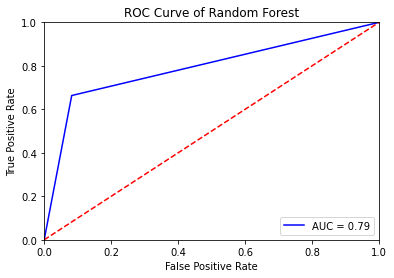

In [112]:
y_scores = tree.predict_proba(X_test)

fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')

plt.show()

In [113]:
from sklearn.metrics import f1_score

In [114]:
f1_score(tree_pred, y_test)

0.39264992586885206

In [115]:
from sklearn.metrics import recall_score

In [117]:
recall_score(y_test, y_pred)

0.6527383207070707

In [118]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.36954385024348835

In [119]:
#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
      
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)        
    print_scores(alg, y_test, y_pred)
    
    
    cm = confusion_matrix(y_test, y_pred)
    #Create the Confusion Matrix Display Object(cmd_obj). 
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'notChurn'])

    #The plot() function has to be called for the sklearn visualization
    cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
    cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!', 
                    xlabel='Predicted Churn', 
                    ylabel='Actual Churn')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
    plt.show()
    
    return model

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

Decision Tree Classification
accuracy:  0.9060757343833667
precision:  0.27863561888684774
recall:  0.6642992424242424
f1_score:  0.9236738980781294


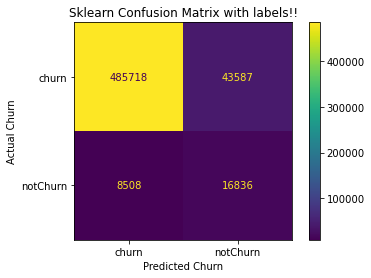

In [121]:
tree = modeling(DecisionTreeClassifier, "Decision Tree Classification")